In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ['Date'])
df.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [9]:
# Renaming columns for easy usage
df.rename(columns = {'Date': 'date',
                      'Province/State': 'state',
                      'Country/Region': 'country',
                      'Lat' : 'lat', 'Long': 'long',
                      'Confirmed' : 'confirmed',
                      'Deaths' : 'deaths',
                      'Recovered' : 'recovered'},
            inplace = True)

In [10]:
# Active Cases
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [11]:
# combining the latest data for the countries 
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed', 'active', 'deaths'].sum().reset_index()
world.head()

country  confirmed  active  deaths
0  Afghanistan       40.0    38.0     1.0
1      Albania       89.0    85.0     2.0
2      Algeria      201.0   119.0    17.0
3      Andorra      113.0   111.0     1.0
4       Angola        2.0     2.0     0.0

In [12]:
figure = px.choropleth(world, locations = 'country',
                        locationmode = 'country names', color = 'active',
                        hover_name = 'country', range_color = [1,1000],
                        color_continuous_scale = "greens",
                        title = "Countries with Active Cases")

figure.show()

In [13]:
# Determine the Total Confimed Cases grouped by Date
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases.head()

date  confirmed
0 2020-01-22      554.0
1 2020-01-23      652.0
2 2020-01-24      939.0
3 2020-01-25     1432.0
4 2020-01-26     2113.0

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

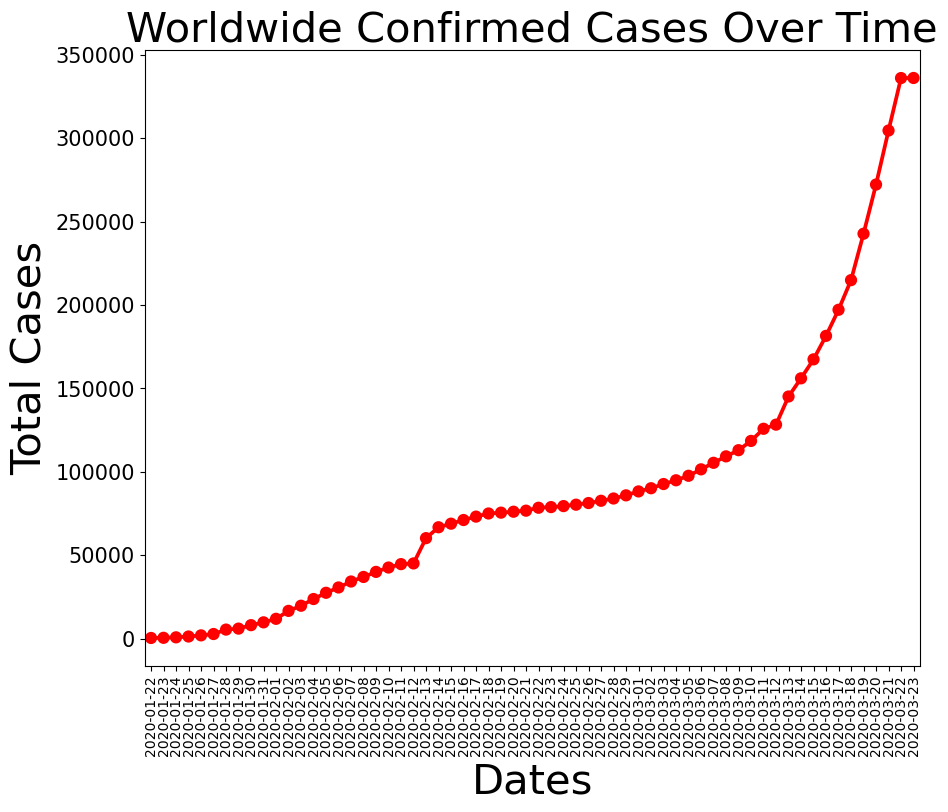

In [14]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 90, fontsize= 10)
plt.yticks (fontsize = 15)
plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total Cases", fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time", fontsize = 30)

ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = 'r')
ax.set(xlabel = 'Dates', ylabel = 'Total Cases')

In [15]:
# Current Top Countries having most Active Cases
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

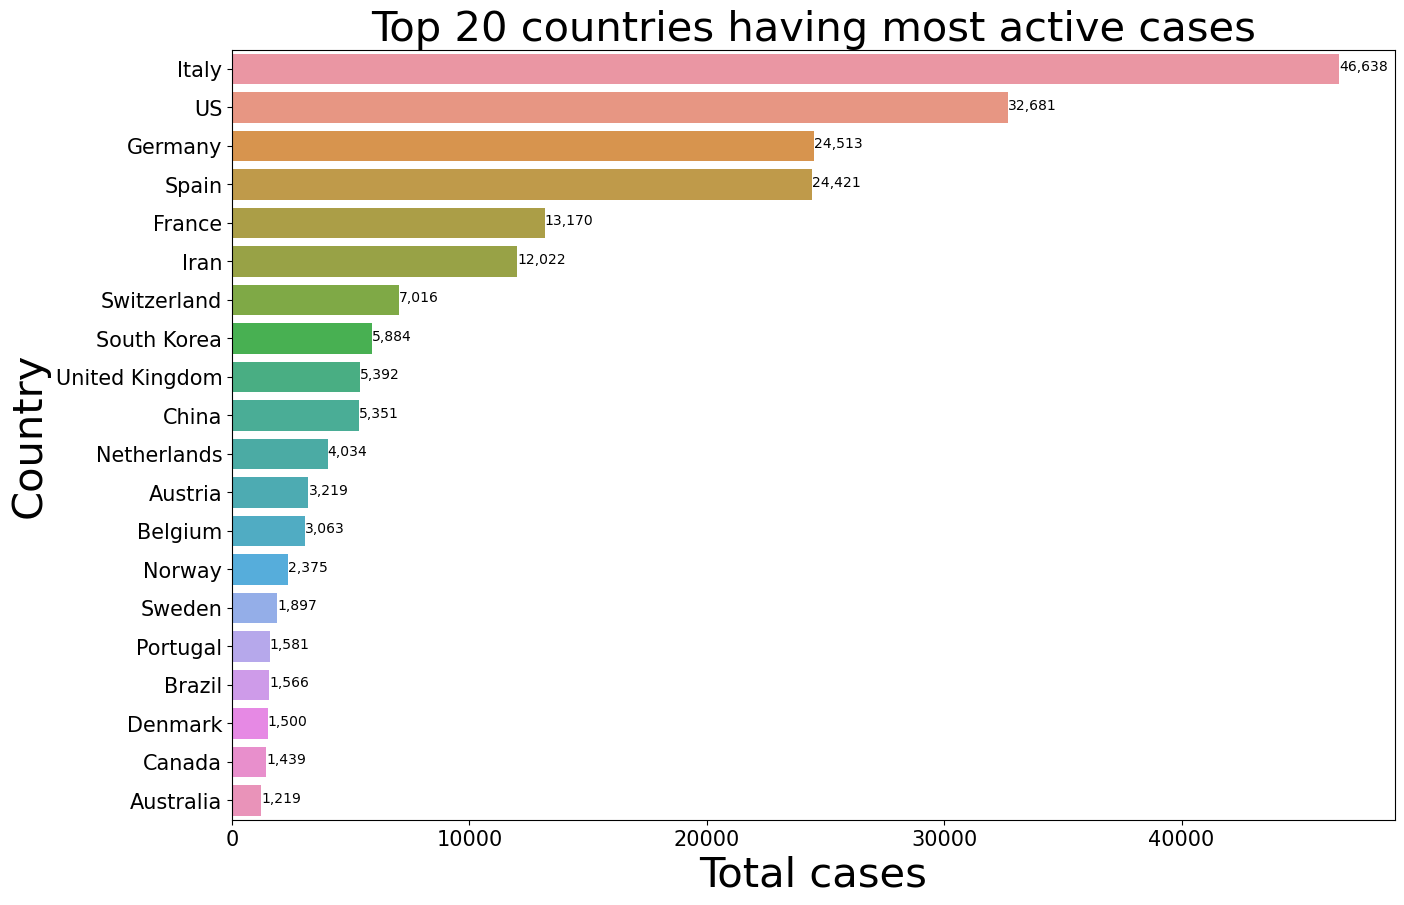

In [16]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize= 15)
plt.yticks (fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel("Country", fontsize = 30)
plt.title("Top 20 countries having most active cases", fontsize = 30)

ax = sns.barplot(x = top_actives.active, y = top_actives.country)

for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha ='left', va = 'center') 
    
ax.set(xlabel = 'Total cases', ylabel = 'Country')

In [17]:
# Data of China
china = df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china.head()

date  recovered  deaths  confirmed  active
0 2020-01-22       28.0    17.0      548.0   503.0
1 2020-01-23       30.0    18.0      643.0   595.0
2 2020-01-24       36.0    26.0      920.0   858.0
3 2020-01-25       39.0    42.0     1406.0  1325.0
4 2020-01-26       49.0    56.0     2075.0  1970.0

In [18]:
# Data of USA
us = df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

date  recovered  deaths  confirmed  active
0 2020-02-24        0.0     0.0       36.0    36.0
1 2020-02-25        0.0     0.0       36.0    36.0
2 2020-02-26        0.0     0.0       42.0    42.0
3 2020-02-27        0.0     0.0       42.0    42.0
4 2020-02-28        0.0     0.0       44.0    44.0

In [19]:
# Data of Italy
italy = df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

date  recovered  deaths  confirmed  active
0 2020-01-31        0.0     0.0        2.0     2.0
1 2020-02-01        0.0     0.0        2.0     2.0
2 2020-02-02        0.0     0.0        2.0     2.0
3 2020-02-03        0.0     0.0        2.0     2.0
4 2020-02-04        0.0     0.0        2.0     2.0

In [20]:
india = df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india.head()

date  recovered  deaths  confirmed  active
0 2020-01-30        0.0     0.0        1.0     1.0
1 2020-01-31        0.0     0.0        1.0     1.0
2 2020-02-01        0.0     0.0        1.0     1.0
3 2020-02-02        0.0     0.0        2.0     2.0
4 2020-02-03        0.0     0.0        3.0     3.0

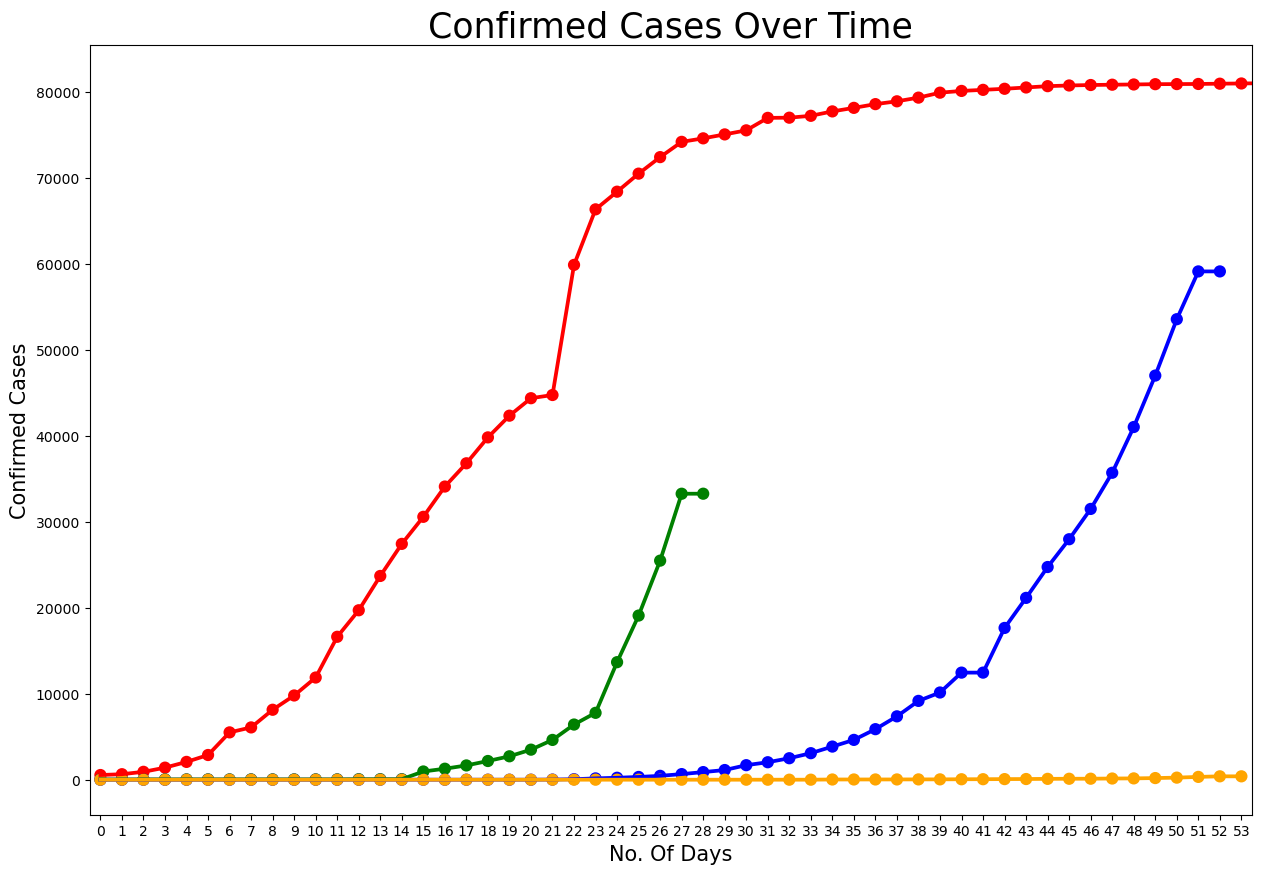

In [21]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.confirmed, color='red')
sns.pointplot(us.index, us.confirmed, color='green')
sns.pointplot(italy.index, italy.confirmed, color='blue')
sns.pointplot(india.index, india.confirmed, color='orange')
plt.title('Confirmed Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Confirmed Cases', fontsize = 15)
plt.show()

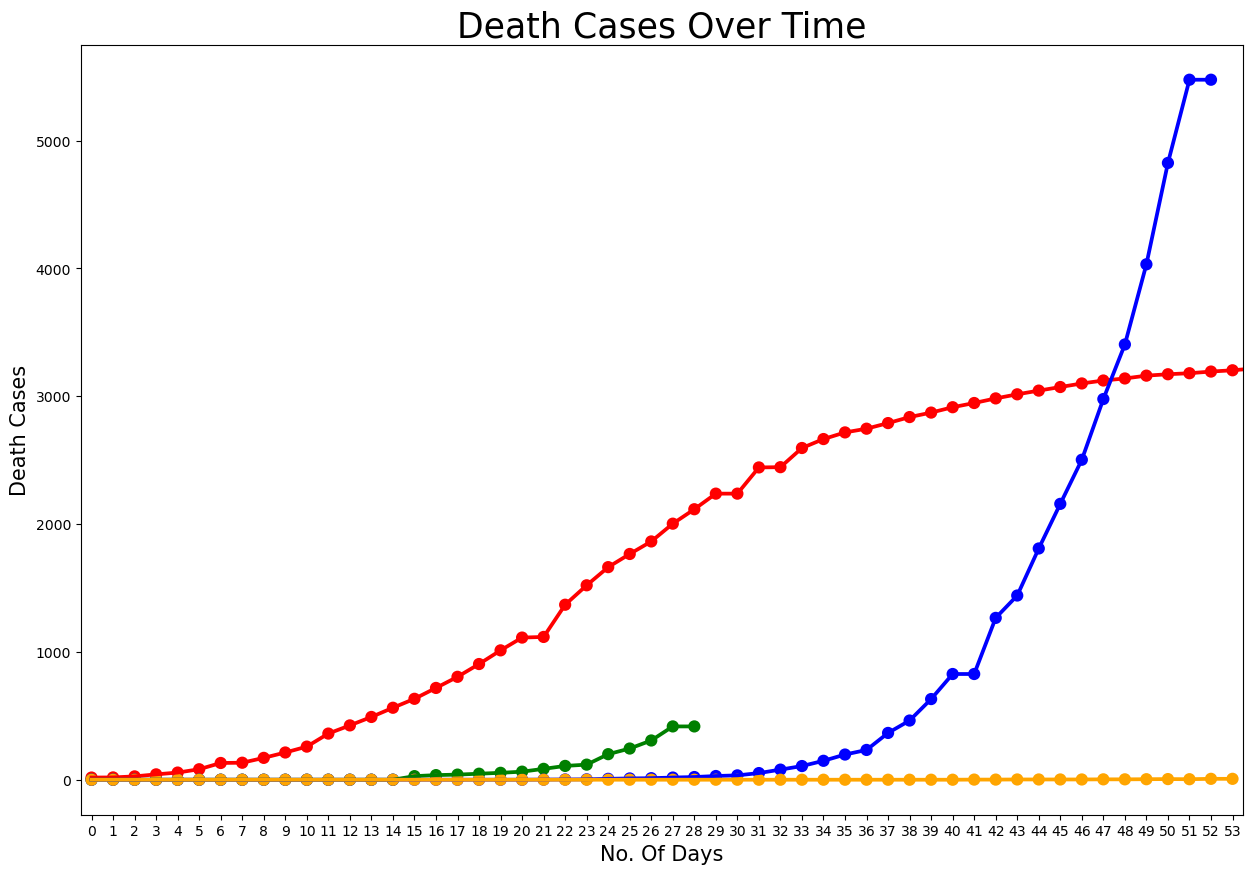

In [22]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.deaths, color='red')
sns.pointplot(us.index, us.deaths, color='green')
sns.pointplot(italy.index, italy.deaths, color='blue')
sns.pointplot(india.index, india.deaths, color='orange')
plt.title('Death Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Death Cases', fontsize = 15)
plt.show()

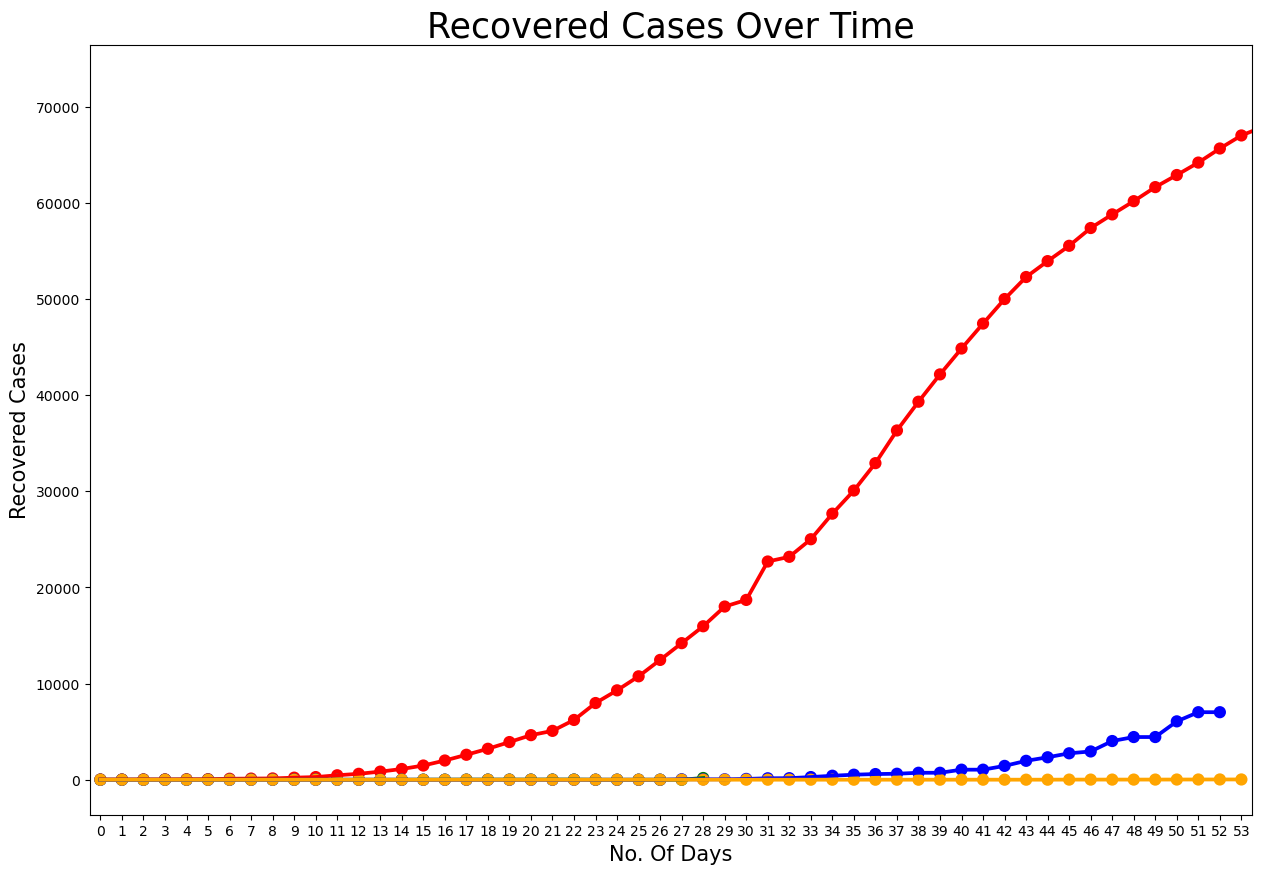

In [23]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.recovered, color='red')
sns.pointplot(us.index, us.recovered, color='green')
sns.pointplot(italy.index, italy.recovered, color='blue')
sns.pointplot(india.index, india.recovered, color='orange')
plt.title('Recovered Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Recovered Cases', fontsize = 15)
plt.show()

# Detailed Analysis of COVID Cases in India

In [24]:
df_india = pd.read_excel('covid_19_india.xlsx')
df_india.head()

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0       1     Andhra Pradesh                                        9   
1       2              Bihar                                        3   
2       3       Chhattisgarh                                        1   
3       4              Delhi                                       30   
4       5            Gujarat                                       32   

   Total Confirmed cases ( Foreign National )  Cured  Death  
0                                           0      0      0  
1                                           0      0      1  
2                                           0      0      0  
3                                           1      6      1  
4                                           1      0      1

In [25]:
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']

In [26]:
df_india['Total Active'] = df_india['Total Cases'] - (df_india['Death'] + df_india['Cured'])
total_active = df_india['Total Active'].sum()
print('Total Number of Active COVID 19 cases across India', total_active)
Tot_Cases = df_india.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap='hot_r')

Total Number of Active COVID 19 cases across India 512


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot:>)

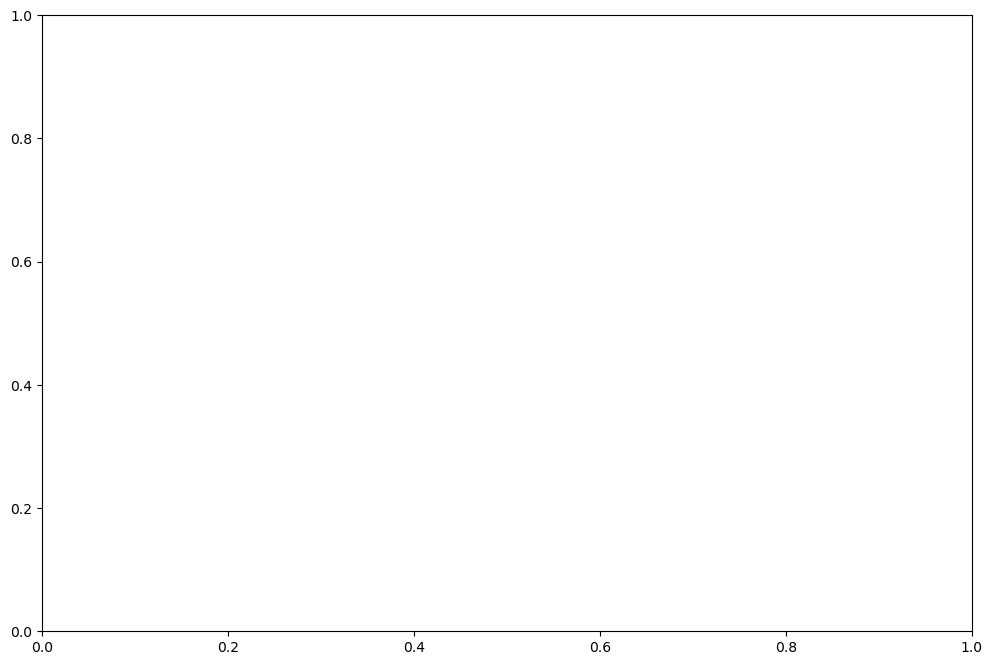

In [27]:
plt.subplots(figsize=(12,8))

[Text(0, 0.5, 'States and UT'), Text(0.5, 0, 'Cases')]

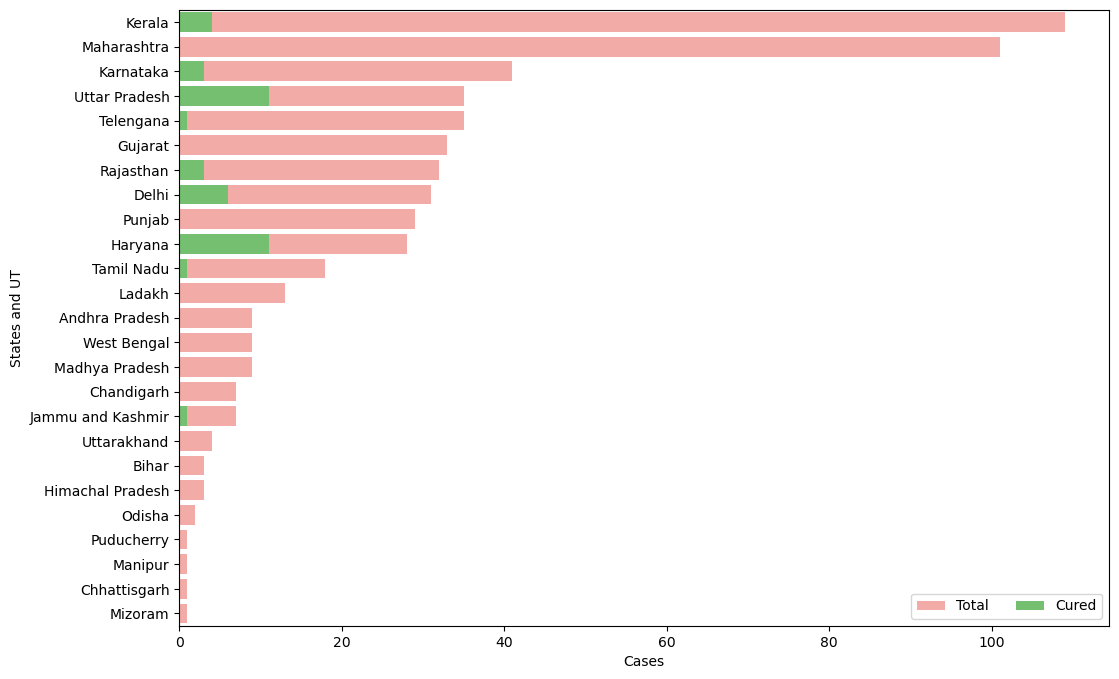

In [28]:
f,ax= plt.subplots(figsize=(12,8))
data = df_india[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases', ascending=False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total", color ="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color ="g")

ax.legend(ncol=2, loc="lower right", frameon = True)
ax.set(ylabel="States and UT", xlabel="Cases")


In [29]:
dbd_india = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Total Cases'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus cases in India (Cumulative Cases)', plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_india, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Insights into COVID cases globally

In [31]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns = {'Country/Region':'Country'}, inplace=True)

In [32]:
df_confirmed.head()

Province/State      Country      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.0000  65.0000        0        0        0   
1            NaN      Albania  41.1533  20.1683        0        0        0   
2            NaN      Algeria  28.0339   1.6596        0        0        0   
3            NaN      Andorra  42.5063   1.5218        0        0        0   
4            NaN       Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/15/20  3/16/20  3/17/20  3/18/20  \
0        0        0        0  ...       16       21       22       22   
1        0        0        0  ...       42       51       55       59   
2        0        0        0  ...       48       54       60       74   
3        0        0        0  ...        1        2       39       39   
4        0        0        0  ...        0        0        0        0   

   3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  
0       22       24       24       40       40       74  
1       64       70       76       89      104      123  
2       87       90      139      201      230      264  
3       53       75       88      113      133      164  
4        0        1        2        2        3        3  

[5 rows x 67 columns]

In [33]:
df_recovered.head()

Province/State    Country      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN   Thailand  15.0000  101.0000        0        0        0   
1            NaN      Japan  36.0000  138.0000        0        0        0   
2            NaN  Singapore   1.2833  103.8333        0        0        0   
3            NaN      Nepal  28.1667   84.2500        0        0        0   
4            NaN   Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  3/16/20  3/17/20  \
0        0        2        2  ...       35       35       35       41   
1        0        1        1  ...      118      118      144      144   
2        0        0        0  ...      105      105      109      114   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...       35       42       42       49   

   3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0       42       42       42       42       44     44.0  
1      144      150      191      232      235    235.0  
2      114      114      124      140      144    144.0  
3        1        1        1        1        1      1.0  
4       60       75       87      114      139    139.0  

[5 rows x 66 columns]

In [34]:
df_deaths.head()

Province/State      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.93911  67.709953        0        0        0   
1            NaN      Albania  41.15330  20.168300        0        0        0   
2            NaN      Algeria  28.03390   1.659600        0        0        0   
3            NaN      Andorra  42.50630   1.521800        0        0        0   
4            NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  12/3/22  12/4/22  12/5/22  12/6/22  \
0        0        0        0  ...     7834     7834     7835     7835   
1        0        0        0  ...     3594     3594     3594     3594   
2        0        0        0  ...     6881     6881     6881     6881   
3        0        0        0  ...      157      157      157      157   
4        0        0        0  ...     1924     1924     1925     1925   

   12/7/22  12/8/22  12/9/22  12/10/22  12/11/22  12/12/22  
0     7837     7839     7839      7839      7839      7840  
1     3594     3594     3594      3594      3594      3594  
2     6881     6881     6881      6881      6881      6881  
3      158      158      158       158       158       158  
4     1925     1925     1925      1925      1925      1925  

[5 rows x 1060 columns]

In [35]:
df.head()

state    country      lat      long       date  confirmed  deaths  \
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0   
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0   
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0   
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0   
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0   

   recovered  active  
0        0.0     2.0  
1        0.0     2.0  
2        0.0     0.0  
3        0.0     0.0  
4        0.0     0.0

In [36]:
df2 = df.groupby(['date', 'country', 'state'])[['date', 'state', 'country', 'confirmed', 'deaths', 'recovered']]
df2.head()

date                         state         country  confirmed  \
5     2020-01-22              British Columbia          Canada        0.0   
6     2020-01-22               New South Wales       Australia        0.0   
7     2020-01-22                      Victoria       Australia        0.0   
8     2020-01-22                    Queensland       Australia        0.0   
19    2020-01-22               South Australia       Australia        0.0   
...          ...                           ...             ...        ...   
19191 2020-03-23                  Sint Maarten     Netherlands        1.0   
19194 2020-03-23                   Isle of Man  United Kingdom        5.0   
19196 2020-03-23         Northwest Territories          Canada        1.0   
19210 2020-03-23  United States Virgin Islands              US        6.0   
19211 2020-03-23                            US              US        1.0   

       deaths  recovered  
5         0.0        0.0  
6         0.0        0.0  
7         0.0        0.0  
8         0.0        0.0  
19        0.0        0.0  
...       ...        ...  
19191     0.0        0.0  
19194     0.0        0.0  
19196     0.0        0.0  
19210     0.0        0.0  
19211     0.0      178.0  

[8432 rows x 6 columns]

In [37]:
df_india_cases = df.query('country == "India"').groupby("date")[['confirmed', 'deaths', 'recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india_cases[['date', 'confirmed']], df_india_cases[['date', 'deaths']], df_india_cases[['date', 'recovered']]

In [38]:
df.groupby('date').sum().head()

lat       long  confirmed  deaths  recovered  active
date                                                                  
2020-01-22  7777.4793  1639.7021      554.0    17.0       28.0   509.0
2020-01-23  7777.4793  1639.7021      652.0    18.0       30.0   604.0
2020-01-24  7777.4793  1639.7021      939.0    26.0       36.0   877.0
2020-01-25  7777.4793  1639.7021     1432.0    42.0       39.0  1351.0
2020-01-26  7777.4793  1639.7021     2113.0    56.0       52.0  2005.0

In [39]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['recovered'].reset_index()

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['confirmed'], mode='lines+markers', name='confirmed', line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['deaths'], mode='lines+markers', name='deaths', line = dict(color = 'red')))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['recovered'], mode='lines+markers', name='recovered', line = dict(color = 'green')))
fig.update_layout(title_text='World wide COVID-19 Cases', xaxis_tickfont_size = 14, yaxis=dict(title='Number of Cases'), plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# TimeSeries Analysis of COVID cases globally and India in Particular

In [41]:
#!pip install pystan~=2.14
#!pip install fbprophet

In [36]:
pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
     -------------------------------------- 754.4/754.4 kB 4.3 MB/s eta 0:00:00
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
     -------------------------------------- 327.1/327.1 kB 3.4 MB/s eta 0:00:00
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp39-cp39-win_amd64.whl (157 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pysta

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [200 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  --- Logging error ---
  Traceback (most recent call last):
    File "C:\Users\hp\anaconda3\lib\logging\__init__.py", line 1086, in emit
      stream.write(msg + self.terminator)
  ValueError: underlying buffer has been detached
  Call stack:
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\hp\AppData\Local\Temp\pip-install-tnou7g8d\fbprophet_423ec7caa0974e1e913ea8fed8b18747\setup.py", line 122, in <module>
      setup(
    File "C:\Users\hp\anaconda3\lib\site-packages\setuptools\__init__.py", line 87, in setup
      return distutils.core.setup(**attrs)
    File "C:\Users\hp\anaconda3\lib\site-packages\setuptools\_di

In [2]:
pip install prophet


     ---------------------------------------- 12.9/12.9 MB 3.6 MB/s eta 0:00:00
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached holidays-0.32-py3-none-any.whl (754 kB)
     ---------------------------------------- 83.2/83.2 kB 4.6 MB/s eta 0:00:00
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)


In [3]:
import warnings; 
warnings.simplefilter('ignore')

In [5]:
from prophet import Prophet

In [42]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])


In [43]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()


23:16:10 - cmdstanpy - INFO - Chain [1] start processing
23:16:10 - cmdstanpy - INFO - Chain [1] done processing


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  355136.949546  333830.163386  374716.541998
65 2020-03-27  372235.404213  352470.230775  390821.696394
66 2020-03-28  388675.043714  367287.777939  409636.944608
67 2020-03-29  405308.040537  382183.166908  426987.110578
68 2020-03-30  418529.738208  395408.921698  442213.376542

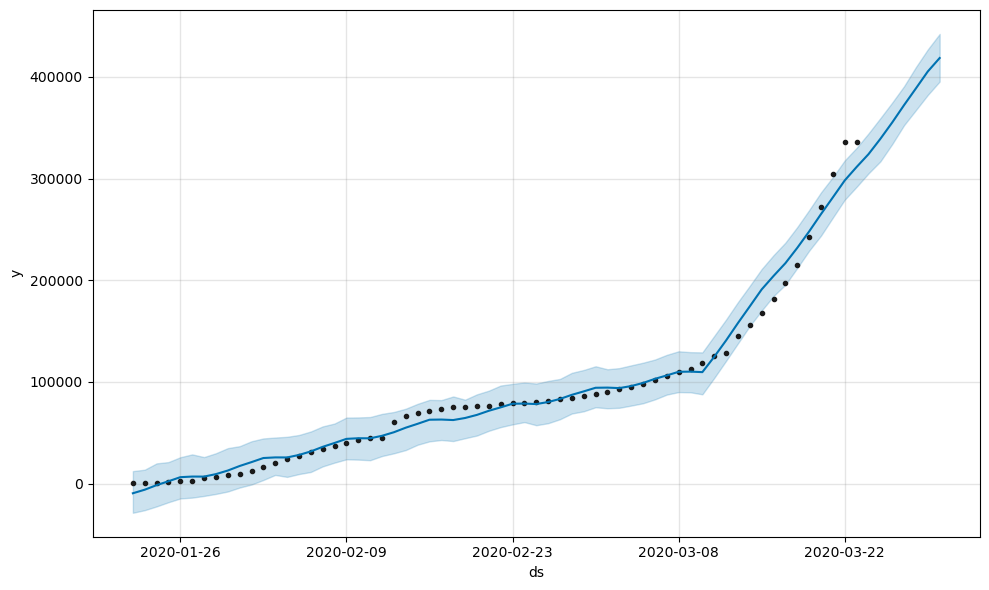

In [45]:
confirmed_forecast_plot = m.plot(forecast)

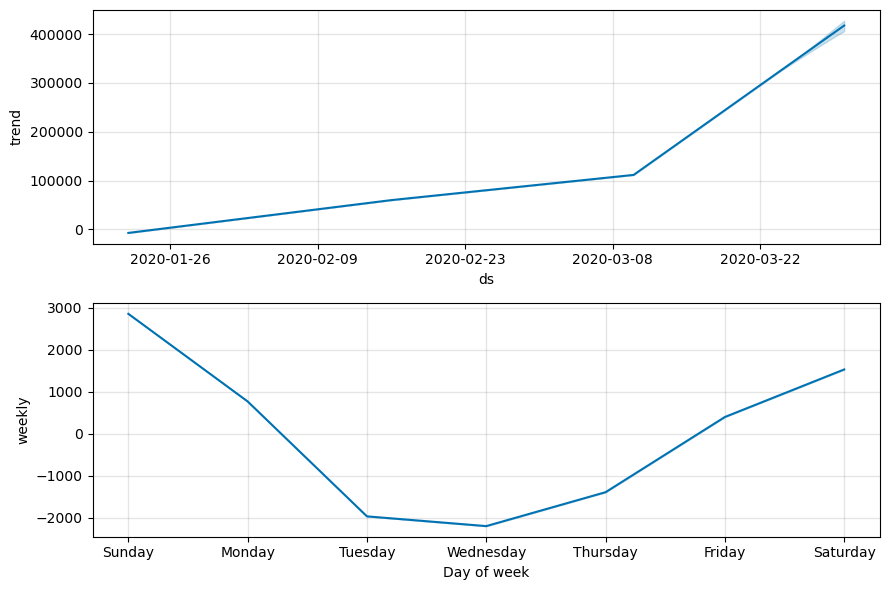

In [46]:
confirmed_forecast_plot = m.plot_components(forecast)

In [47]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [48]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

23:16:35 - cmdstanpy - INFO - Chain [1] start processing
23:16:35 - cmdstanpy - INFO - Chain [1] done processing


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
64 2020-03-26  15411.895821  14828.048908  15986.282803
65 2020-03-27  16199.637166  15540.082263  16828.559134
66 2020-03-28  17006.925198  16404.823501  17665.744981
67 2020-03-29  17831.527103  17175.328826  18480.290778
68 2020-03-30  18491.009178  17807.036266  19148.577316

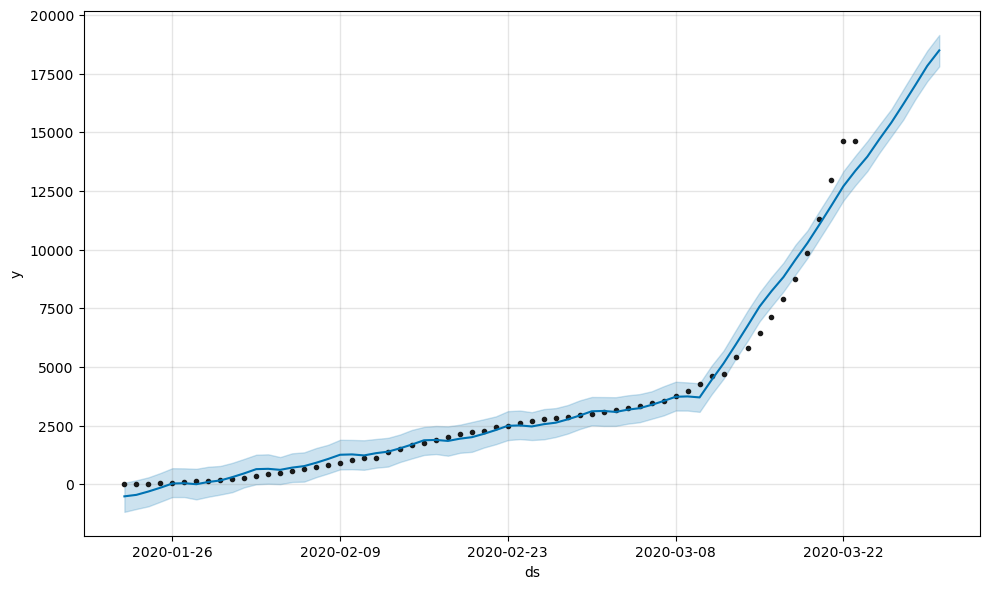

In [50]:
deaths_forecast_plot = m.plot(forecast)

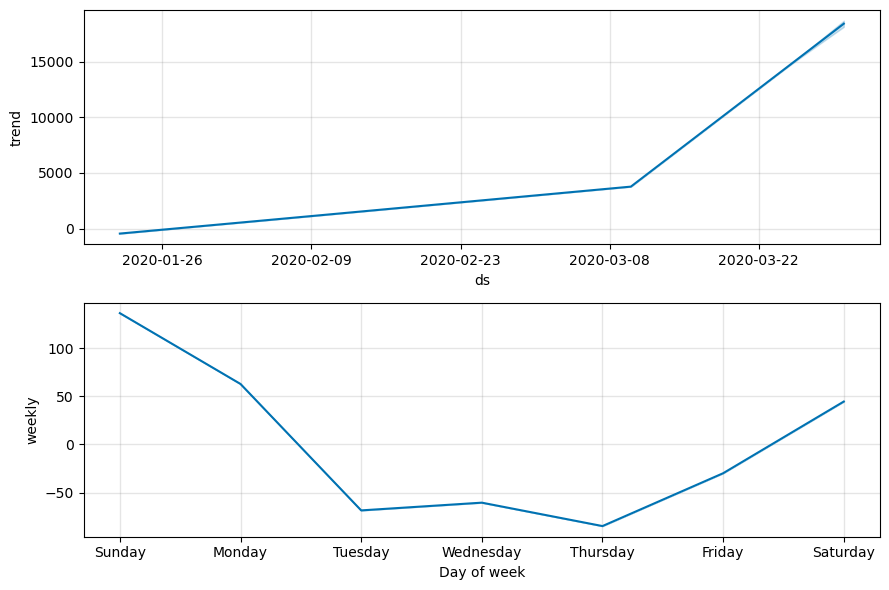

In [51]:
deaths_forecast_plot = m.plot_components(forecast)

In [52]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [53]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

23:16:40 - cmdstanpy - INFO - Chain [1] start processing
23:16:41 - cmdstanpy - INFO - Chain [1] done processing


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  103261.023489  102216.746724  104335.735887
65 2020-03-27  105630.559311  104508.453150  106782.468994
66 2020-03-28  108578.276887  107305.707280  109894.702224
67 2020-03-29  111470.664139  110025.555240  112957.538787
68 2020-03-30  113631.007142  112023.204336  115350.274567

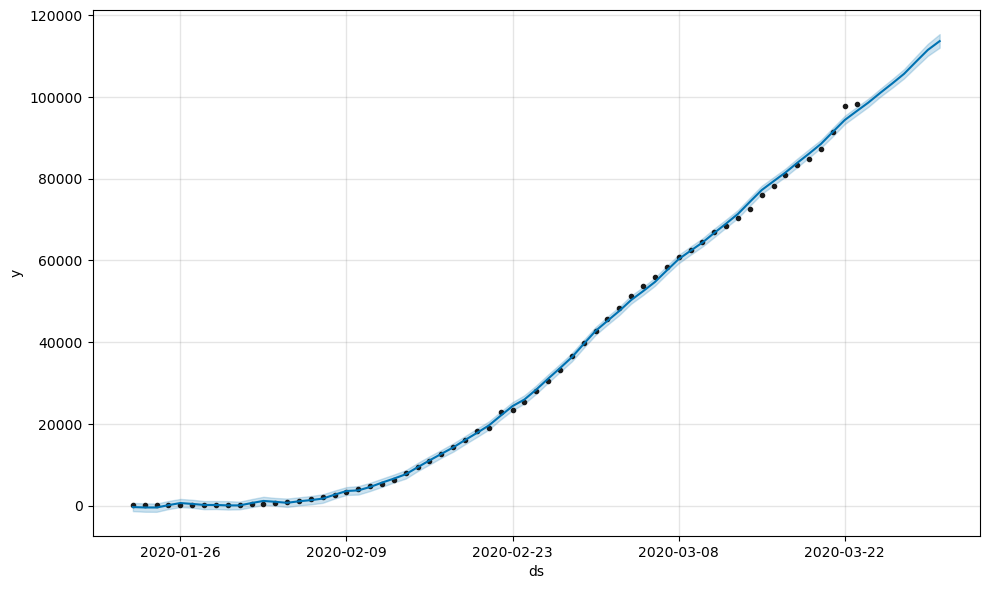

In [55]:
recovered_forecast_plot = m.plot(forecast)

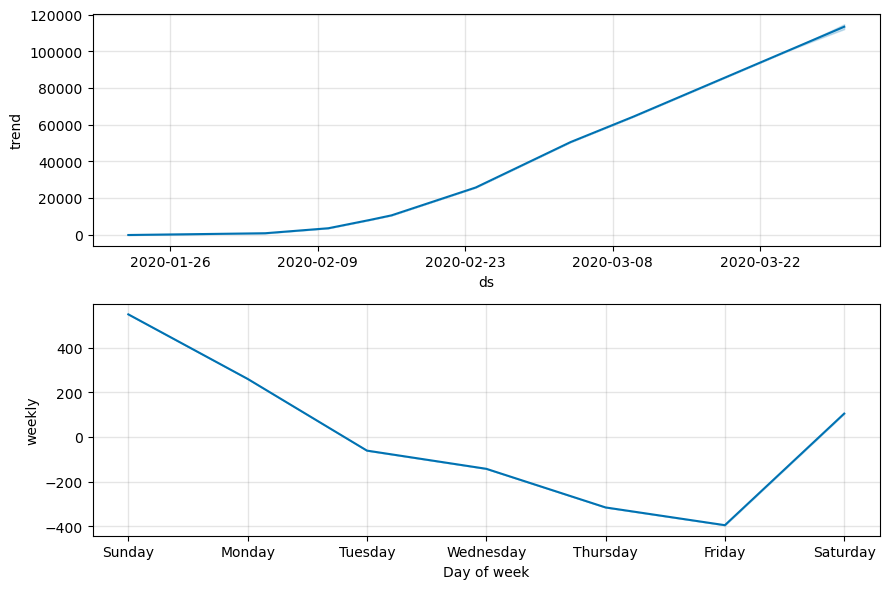

In [56]:
recovered_forecast_plot = m.plot_components(forecast)

In [57]:
india_confirmed.columns = ['ds', 'y']
india_confirmed['ds']= pd.to_datetime(india_confirmed['ds'])

In [58]:
m = Prophet()
m.fit(india_confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

23:16:45 - cmdstanpy - INFO - Chain [1] start processing
23:16:45 - cmdstanpy - INFO - Chain [1] done processing


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [59]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
64 2020-03-26  153.433398   67.737720  243.728467
65 2020-03-27  160.140573   72.443990  242.775095
66 2020-03-28  172.292186   90.150509  259.138118
67 2020-03-29  181.553314   99.104496  270.092233
68 2020-03-30  183.035794   98.570532  262.530270

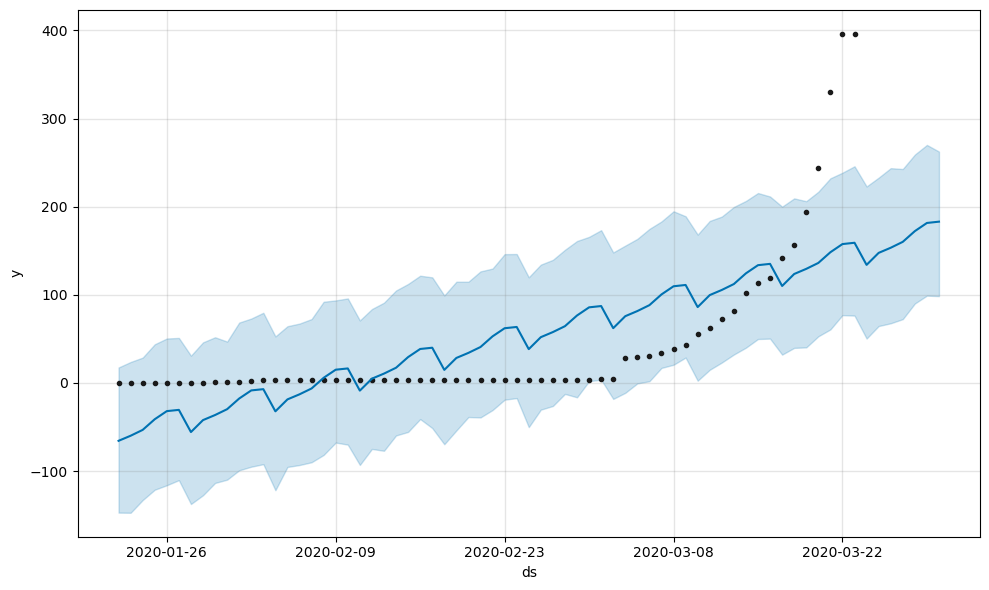

In [60]:
india_confirmed_plot = m.plot(forecast)

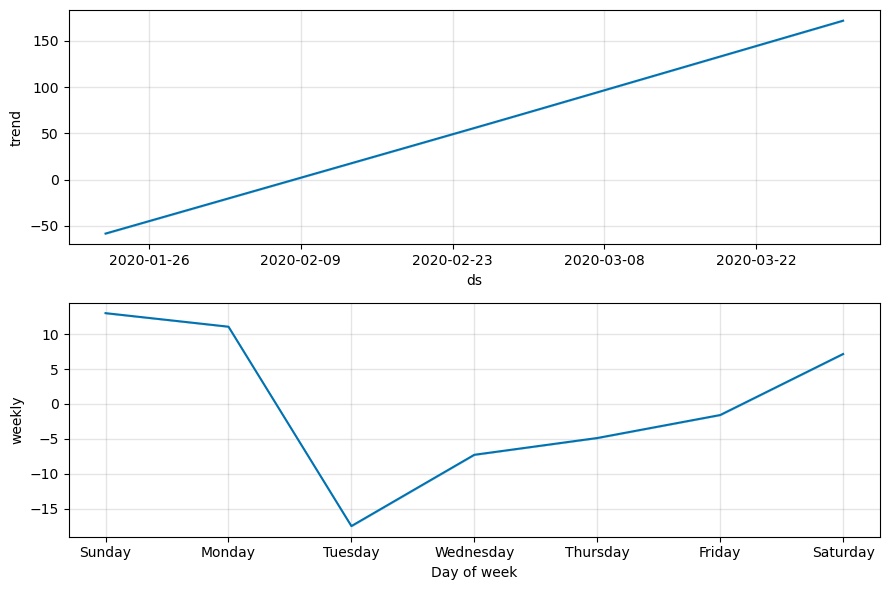

In [61]:
india_confirmed_plot = m.plot_components(forecast)

In [62]:
india_deaths.columns = ['ds', 'y']
india_deaths['ds']= pd.to_datetime(india_deaths['ds'])

In [63]:
m = Prophet()
m.fit(india_deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

23:16:49 - cmdstanpy - INFO - Chain [1] start processing
23:16:49 - cmdstanpy - INFO - Chain [1] done processing


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [64]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
64 2020-03-26  2.561540    1.061310    4.118484
65 2020-03-27  2.784176    1.331727    4.340768
66 2020-03-28  2.673482    1.151519    4.245593
67 2020-03-29  3.007218    1.377254    4.712409
68 2020-03-30  3.007621    1.371811    4.654375

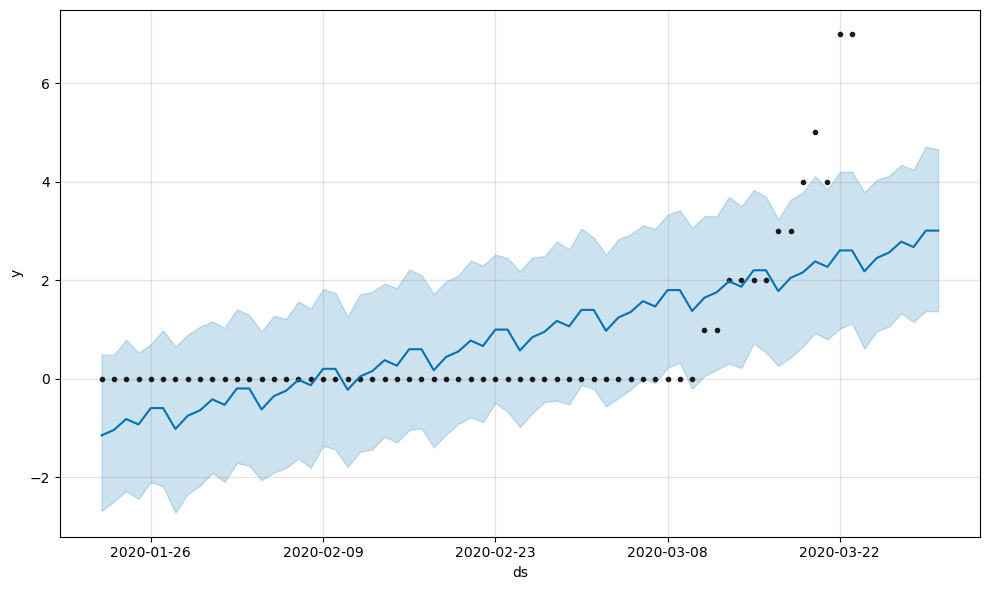

In [65]:
india_deaths_plot = m.plot(forecast)

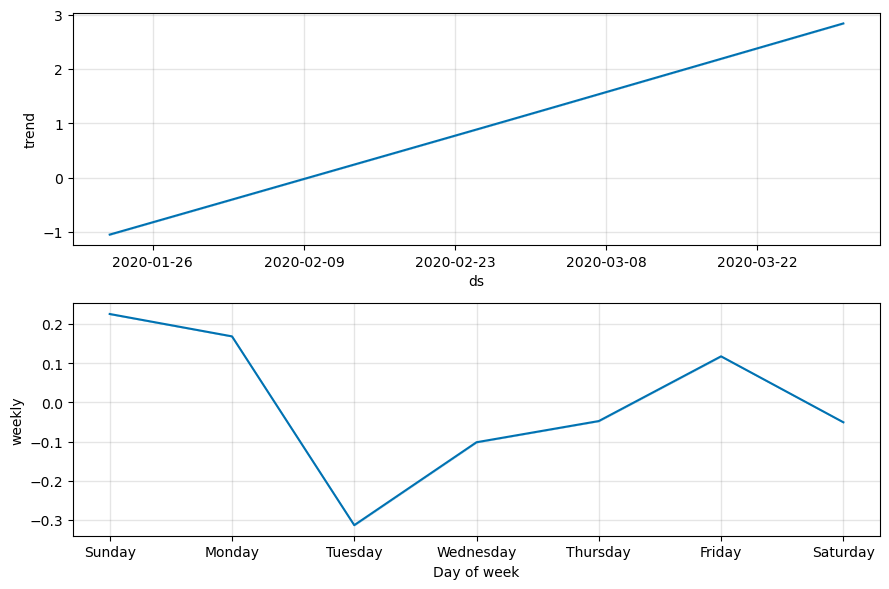

In [66]:
india_deaths_plot = m.plot_components(forecast)

In [67]:
india_recovered.columns = ['ds', 'y']
india_recovered['ds']= pd.to_datetime(india_recovered['ds'])

In [68]:
m = Prophet()
m.fit(india_recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

23:16:53 - cmdstanpy - INFO - Chain [1] start processing
23:16:53 - cmdstanpy - INFO - Chain [1] done processing


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [69]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
64 2020-03-26  12.347320    6.882496   17.792719
65 2020-03-27  12.904069    7.602473   18.241158
66 2020-03-28  13.238539    7.348355   18.684337
67 2020-03-29  15.017419    9.722587   20.769485
68 2020-03-30  15.018438    9.400059   20.081107

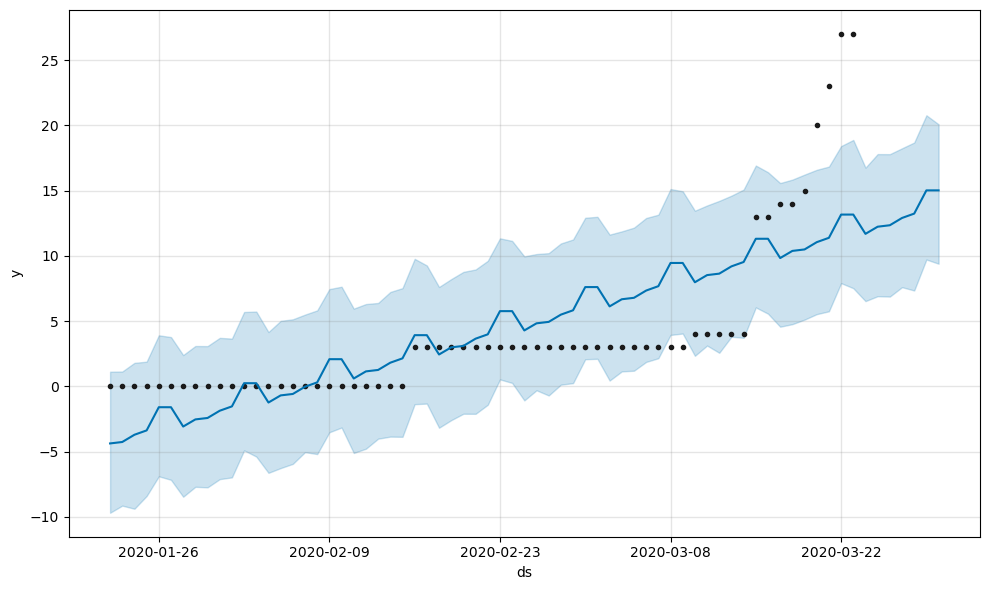

In [70]:
india_recovered_plot = m.plot(forecast)

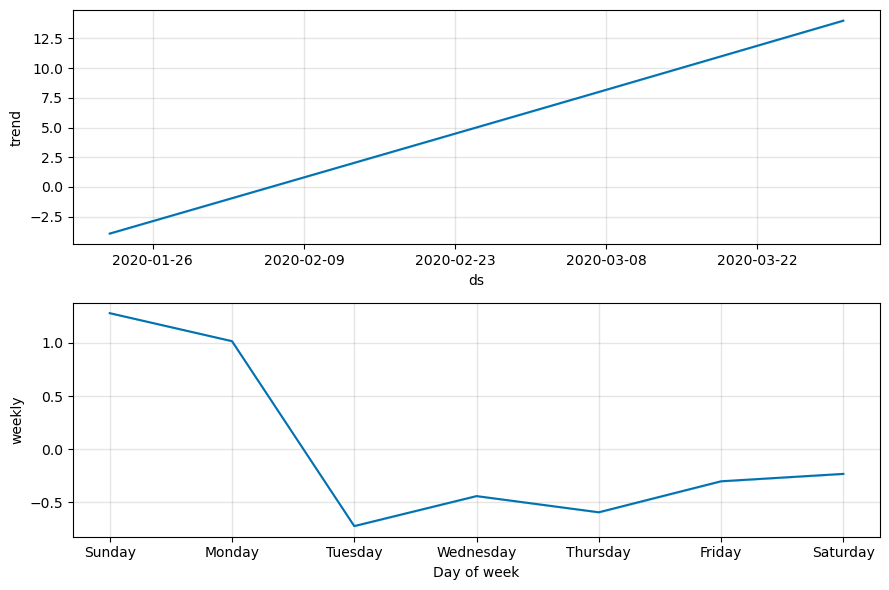

In [71]:
india_recovered_plot = m.plot_components(forecast)